# **Problem Statement:**

Fashion MNIST is a dataset comprising 60,000 training images and 10,000
testing images, each depicting various fashion items in a 28x28 grayscale format.
The dataset encompasses ten distinct categories of apparel. The primary aim of
this assignment is to develop a fully connected neural network (FCNN) that can
accurately classify these images into the correct fashion categories.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
print(x_train.shape)# Images in train
print(x_test.shape)
print(y_train.shape)# Target variable for train data
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Label	Description
0	T-shirt/top,
1	Trouser,
2	Pullover,
3	Dress,
4	Coat,
5	Sandal,
6	Shirt,
7	Sneaker,
8	Bag,
9	Ankle boot,


# **Objectives:**

Data Visualization and Preprocessing :

● Visualize the distribution of different fashion items in the dataset to
understand the data better.

● Normalize the image pixel values for effective model training.

● Convert the categorical labels into a one-hot encoded format to suit the
neural network's output layer.

In [4]:
classes = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

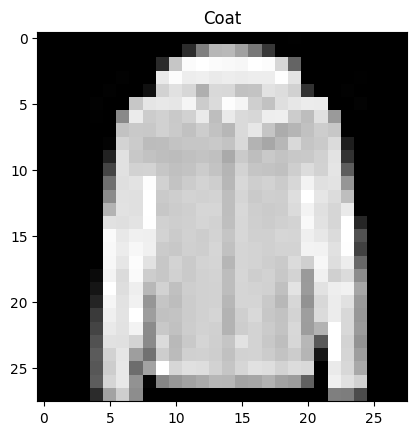

In [8]:
n=5000
plt.imshow(x_train[n], cmap="gray")
plt.title(classes[y_train[n]])
plt.show()

In [9]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [10]:
## For CNN's data needs to available in a specific shape

'''
input_shape = (n, w, h, c)

n = number of images
w = width
h = height
c = channels

(60000, 28, 28, 1)

'''

x_train = x_train.reshape(60000, 28, 28, 1).astype("float")
x_test = x_test.reshape(10000, 28, 28, 1).astype("float")


# **Model Architecture and Development**:

● Design a fully connected neural network with appropriate input, hidden,
and output layers.

● Ensure the model is complex enough to capture the underlying patterns in
the data without overfitting.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPool2D, Activation

In [12]:
model = Sequential()
model.add(Conv2D(filters = 4, kernel_size=(3,3), strides= (1,1), padding = "valid", activation = "relu")) # 28x28x1
# model.add(Activation("relu")) # 26x26x4 - Added activation function in the conv layer param
model.add(MaxPool2D(pool_size = (2,2))) # 13x13x4
model.add(Flatten())# 13x13x4 = 676 Units in each image
model.add(Dense(10, activation= "softmax")) # Output for 10 class classfn

# **Model Training:**

● Train the model on the preprocessed training data, using categorical
cross-entropy as the loss function, stochastic gradient descent as the
optimizer, and accuracy as the evaluation metric.

● Utilize a validation split to monitor the model's performance on unseen
data during training.

In [19]:
#model.compile(optimizer="adam",
#              loss="categorical_crossentropy",
 #             metrics="accuracy")

model.compile(optimizer="SGD",
              loss="categorical_crossentropy",
              metrics="accuracy")

In [24]:
model.fit(x=x_train, y=y_train_ohe, epochs=10, validation_data=(x_test, y_test_ohe), batch_size=1000)

Epoch 1/10
60/60 [==============================] - 10s 166ms/step - loss: 0.6017 - accuracy: 0.7915 - val_loss: 0.6214 - val_accuracy: 0.7862
Epoch 2/10
60/60 [==============================] - 10s 165ms/step - loss: 0.5749 - accuracy: 0.8007 - val_loss: 0.5824 - val_accuracy: 0.8016
Epoch 3/10
60/60 [==============================] - 9s 143ms/step - loss: 0.5527 - accuracy: 0.8077 - val_loss: 0.5582 - val_accuracy: 0.8098
Epoch 4/10
60/60 [==============================] - 10s 165ms/step - loss: 0.5365 - accuracy: 0.8122 - val_loss: 0.5449 - val_accuracy: 0.8134
Epoch 5/10
60/60 [==============================] - 10s 165ms/step - loss: 0.5280 - accuracy: 0.8157 - val_loss: 0.5481 - val_accuracy: 0.8120
Epoch 6/10
60/60 [==============================] - 10s 166ms/step - loss: 0.5101 - accuracy: 0.8217 - val_loss: 0.5207 - val_accuracy: 0.8183
Epoch 7/10
60/60 [==============================] - 9s 144ms/step - loss: 0.5053 - accuracy: 0.8225 - val_loss: 0.5237 - val_accuracy: 0.8193
E

In [25]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (1000, 26, 26, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2  (1000, 13, 13, 4)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (1000, 676)               0         
                                                                 
 dense (Dense)               (1000, 10)                6770      
                                                                 
Total params: 6810 (26.60 KB)
Trainable params: 6810 (26.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# **Performance Evaluation:**

● Assess the model’s performance using both training and validation
datasets.

● Visualize the training and validation loss and accuracy to identify any signs
of overfitting or underfitting.

The best way to detect overfitting and underfitting is to monitor the training and validation errors of your model. The training error is the error that your model makes on the data that it was trained on, while the validation error is the error that your model makes on the data that it was not trained on, but used to evaluate its performance. Ideally, you want both errors to be low and close to each other, indicating that your model is accurate and generalizable. However, if your training error is much lower than your validation error, you have overfitting. If your training error and validation error are both high, or your validation error is lower than your training error, you have underfitting.

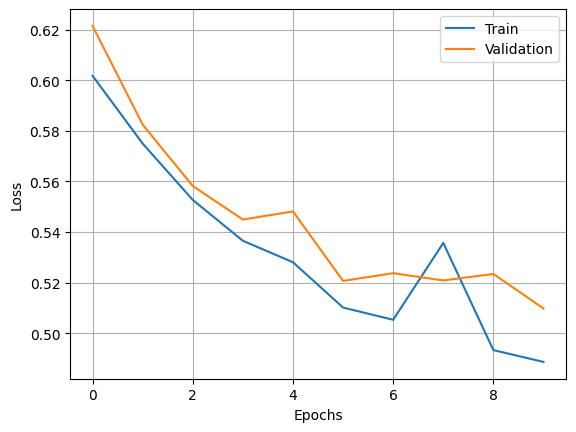

In [26]:
history = model.history.history

train_loss= history["loss"]
val_loss= history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

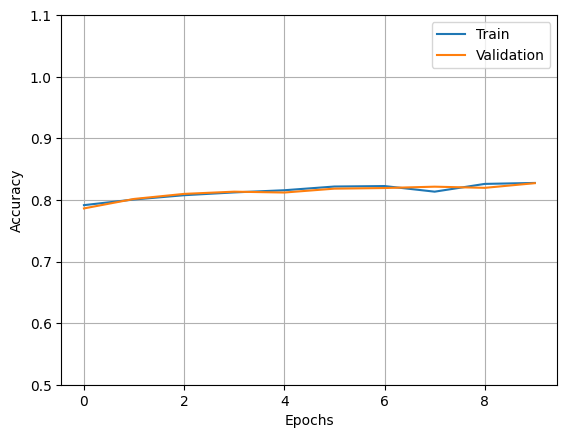

In [27]:
train_acc= history["accuracy"]
val_acc= history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.ylim(0.5,1.1)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

# **Conclusion:**

An underfit model is one that is demonstrated to perform well on the training dataset and poor on the test dataset.

This can be diagnosed from a plot where the training loss is lower than the validation loss, and the validation loss has a trend that suggests further improvements are possible.
In this case, performance may be improved by increasing the number of training epochs.

A good fit is a case where the performance of the model is good on both the train and validation sets.

This can be diagnosed from a plot where the train and validation loss decrease and stabilize around the same point.

An overfit model is one where performance on the train set is good and continues to improve, whereas performance on the validation set improves to a point and then begins to degrade.

This can be diagnosed from a plot where the train loss slopes down and the validation loss slopes down, hits an inflection point, and starts to slope up again.